In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore")

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [112]:
data = pd.read_excel("../../data/market_data.xlsx")
data.head(3)

,Time (UTC+10),Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW)
0,2018-01-01 00:00:00,88.00,103.11,90.55,90.43,0.18,60.53,121.68,146.87,7100,1398,1091,4599
1,2018-01-01 00:30:00,91.86,107.17,92.28,92.46,0.15,43.07,118.73,131.68,6974,1359,1082,4398
2,2018-01-01 01:00:00,88.83,103.31,87.53,87.62,0.13,41.67,110.48,119.98,6790,1316,1071,4238


In [116]:
data.columns = ['time', 'spot_price_nsw', 'spot_price_sa', 'spot_price_tas', 'spot_price_vic',
                'inter_gen_nsw', 'inter_gen_sa', 'inter_gen_tas', 'inter_gen_vic',
                'demand_nsw', 'demand_sa', 'demand_tas', 'demand_vic']

# Victoria
vic = data.iloc[:, [0, 4, 8, 12]]
vic.columns = ['time', 'spot_price', 'inter_gen', 'demand']

# Tasmania
tas = data.iloc[:, [0, 3, 7, 11]]
tas.columns = ['time', 'spot_price', 'inter_gen', 'demand']

# South Australia
sa = data.iloc[:, [0, 2, 6, 10]]
sa.columns = ['time', 'spot_price', 'inter_gen', 'demand']

# New South Wales
nsw = data.iloc[:, [0, 1, 5, 9]]
nsw.columns = ['time', 'spot_price', 'inter_gen', 'demand']

vic.head(3)

,time,spot_price,inter_gen,demand
0,2018-01-01 00:00:00,90.43,146.87,4599
1,2018-01-01 00:30:00,92.46,131.68,4398
2,2018-01-01 01:00:00,87.62,119.98,4238


In [118]:
data.dtypes

time              datetime64[ns]
spot_price_nsw           float64
spot_price_sa            float64
spot_price_tas           float64
spot_price_vic           float64
inter_gen_nsw            float64
inter_gen_sa             float64
inter_gen_tas            float64
inter_gen_vic            float64
demand_nsw                 int64
demand_sa                  int64
demand_tas                 int64
demand_vic                 int64
dtype: object

In [119]:
# check missing value
data.isnull().sum().sum()

0

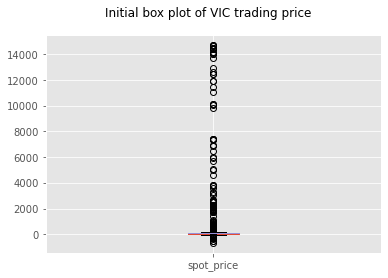

In [120]:
# initial view of fees
price_box = vic.boxplot(column=["spot_price"])
fig1 = price_box.get_figure()

fig1.suptitle("Initial box plot of VIC trading price")
fig1.show()


In [121]:
vic.describe()["spot_price"]

count   63457.00
mean       78.75
std       289.26
min      -676.37
25%        39.01
50%        64.11
75%        94.85
max     14700.00
Name: spot_price, dtype: float64

In [122]:
# check noise data
vic.loc[~vic["time"].dt.year.isin(([2018,2019,2020,2021]))]

,time,spot_price,inter_gen,demand


In [123]:
# add period corresponding to each period
period = pd.DataFrame({"period_time":pd.date_range('2018-01-01', periods=48, freq="30T").time})
period.index +=1
period["period"] = period.index

# All data
data['period_time'] = data.time.dt.time
data['period'] = pd.merge(data, period, how="left").period
data = data.drop(columns=['period_time'])

# Victoria
vic["period_time"] = vic["time"].dt.time
vic['period'] = pd.merge(vic, period, how="left").period
vic = vic.drop(columns=['period_time'])

# Tasmania
tas["period_time"] = tas["time"].dt.time
tas['period'] = pd.merge(tas, period, how="left").period
tas = tas.drop(columns=['period_time'])

# South Australia
sa["period_time"] = sa["time"].dt.time
sa['period'] = pd.merge(sa, period, how="left").period
sa = sa.drop(columns=['period_time'])

# New South Wales
nsw["period_time"] = nsw["time"].dt.time
nsw['period'] = pd.merge(nsw, period, how="left").period
nsw = nsw.drop(columns=['period_time'])

### Visualisation for lowest price

In [124]:
# The first 200data with lowest trading price
lowest_200 = vic.sort_values(by=["spot_price"]).head(200)

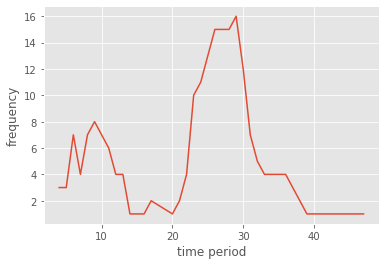

In [125]:
lowest_count = lowest_200.groupby("period").count()["spot_price"]
plt.plot(lowest_count.index, lowest_count)
plt.xlabel('time period', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

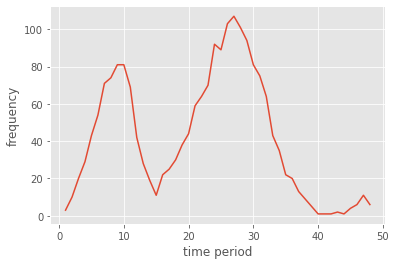

In [126]:
# frequency of negative price period
negative_price = vic.loc[VIC["spot_price"] <0]
negative_count = negative_price.groupby("period").count()["spot_price"]
plt.plot(negative_count.index, negative_count)
plt.xlabel('time period', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

### Visualisation for highest price

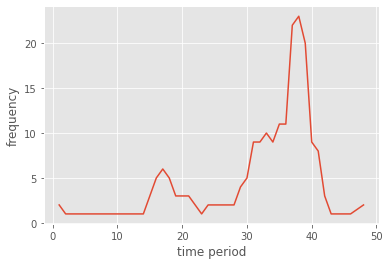

In [127]:
# The first 200 data with lowest trading price
highest_200 = vic.sort_values(by=["spot_price"]).tail(200)
highest_count = highest_200.groupby("period").count()["spot_price"]
plt.plot(highest_count.index, highest_count)
plt.xlabel('time period', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.show()

In [128]:
# split dataset into training set, validation set, and test set and output to csv

# All
data_train = data[data['time'] <= "2020-12-31 23:30:00"]
data_cv = data[(data['time'] >= "2021-01-01 00:00:00") & (data['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)
data_test = data[(data['time'] >= "2021-07-01 00:00:00") & (data['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
data.to_csv("../../data/all.csv", index= False, header=True)
data_train.to_csv("../../data/all_train.csv", index= False, header=True)
data_cv.to_csv("../../data/all_cv.csv", index= False, header=True)
data_test.to_csv("../../data/all_test.csv", index= False, header=True)

# Victoria
vic_train = vic[vic['time'] <= "2020-12-31 23:30:00"]
vic_cv = vic[(vic['time'] >= "2021-01-01 00:00:00") & (vic['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)
vic_test = vic[(vic['time'] >= "2021-07-01 00:00:00") & (vic['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
vic.to_csv("../../data/vic.csv", index= False, header=True)
vic_train.to_csv("../../data/vic_train.csv", index= False, header=True)
vic_cv.to_csv("../../data/vic_cv.csv", index= False, header=True)
vic_test.to_csv("../../data/vic_test.csv", index= False, header=True)

# Tasmania
tas_train = tas[tas['time'] <= "2020-12-31 23:30:00"]
tas_cv = tas[(tas['time'] >= "2021-01-01 00:00:00") & (tas['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)
tas_test = tas[(tas['time'] >= "2021-07-01 00:00:00") & (tas['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
tas.to_csv("../../data/tas.csv", index= False, header=True)
tas_train.to_csv("../../data/tas_train.csv", index= False, header=True)
tas_cv.to_csv("../../data/tas_cv.csv", index= False, header=True)
tas_test.to_csv("../../data/tas_test.csv", index= False, header=True)

# South Australia
sa_train = sa[sa['time'] <= "2020-12-31 23:30:00"]
sa_cv = sa[(sa['time'] >= "2021-01-01 00:00:00") & (sa['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)
sa_test = sa[(sa['time'] >= "2021-07-01 00:00:00") & (sa['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
sa.to_csv("../../data/sa.csv", index= False, header=True)
sa_train.to_csv("../../data/sa_train.csv", index= False, header=True)
sa_cv.to_csv("../../data/sa_cv.csv", index= False, header=True)
sa_test.to_csv("../../data/sa_test.csv", index= False, header=True)

# New South Wales
nsw_train = nsw[nsw['time'] <= "2020-12-31 23:30:00"]
nsw_cv = nsw[(nsw['time'] >= "2021-01-01 00:00:00") & (nsw['time'] <= "2021-06-30 23:30:00")].reset_index(drop=True)
nsw_test = nsw[(nsw['time'] >= "2021-07-01 00:00:00") & (nsw['time'] <= "2021-08-11 23:30:00")].reset_index(drop=True)
nsw.to_csv("../../data/nsw.csv", index= False, header=True)
nsw_train.to_csv("../../data/nsw_train.csv", index= False, header=True)
nsw_cv.to_csv("../../data/nsw_cv.csv", index= False, header=True)
nsw_test.to_csv("../../data/nsw_test.csv", index= False, header=True)